# Анализ данных рынка недвижимости. Предобработка данных

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

### 1. Загрузка данных и общая информация

In [5]:
# Считать датасет, столбец с датой публикации объявления сразу преобразовать в datetime
path = 'https://gist.github.com/a-antonchev/f6eeafda405f4fc19d43965d3bcc462e/raw/rent_apartments.csv'
rent = pd.read_csv(path, sep=',', parse_dates=['published'], date_format='%d/%m/%Y')
rent.head(4)

,object_type,type,rooms,level,kitchen_area,living_area,area,price_by_meter,price,material,...,build_walls,heating,gas,longitude,latitude,agencyName,areaRating,city,remoute_from_center,build_oldest
0,0,Не заполнено,2,3/5,10.0,40.0,60.0,200.0,12000.0,Панель,...,Не заполнено,0,0,47.863361,56.647657,Антон,3.634451,Йошкар-Ола,1.951714,new
1,0,Квартира,2,1/10,12.0,45.0,60.0,583.0,35000.0,Кирпич,...,0,0,0,47.877609,56.625316,Антон Александрович,3.634451,Йошкар-Ола,1.702297,new
2,0,Многоквартирный дом,3,1/5,10.0,54.0,82.0,268.0,22000.0,Кирпич,...,Кирпич,Центральное,Да,47.900983,56.644836,"Риелторская компания ""Партнеры""",3.634451,Йошкар-Ола,0.920945,old
3,0,Многоквартирный дом,1,2/5,8.0,18.0,35.0,314.0,11000.0,Кирпич,...,Кирпич,Центральное,Да,47.878426,56.647054,"Риелторская компания ""Партнеры""",3.634451,Йошкар-Ола,1.193907,old


In [7]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12107 entries, 0 to 12106
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   object_type          12107 non-null  int64         
 1   type                 12107 non-null  object        
 2   rooms                12107 non-null  int64         
 3   level                12107 non-null  object        
 4   kitchen_area         8595 non-null   float64       
 5   living_area          8052 non-null   float64       
 6   area                 12107 non-null  float64       
 7   price_by_meter       12107 non-null  float64       
 8   price                12107 non-null  float64       
 9   material             12072 non-null  object        
 10  published            12107 non-null  datetime64[ns]
 11  updated              12107 non-null  object        
 12  build_year           12107 non-null  int64         
 13  build_serias         12107 non-

In [9]:
# Получить размерность сформированного датасета
rent.shape

(12107, 30)

In [11]:
# Значения в столбце rooms (количество комнат в квартире); квартиры с количеством комнат 0 - студии
rent.rooms.value_counts()

rooms
2     4228
1     3831
3     2270
4      728
0      657
5      361
7       13
8        9
10       7
9        3
Name: count, dtype: int64

In [13]:
# Значения и их количество в столбце material (материал постройки дома)
rent.material.value_counts()

material
Кирпич     4194
Монолит    3944
Панель     3500
Блоки       428
Дерево        6
Name: count, dtype: int64

In [15]:
# Значения и их количество в столбце build_oldest (новизна дома)
rent.build_oldest.value_counts()

build_oldest
new       5438
old       4443
middle    2226
Name: count, dtype: int64

### 2. Обработка дубликатов

В соответствии с техническим заданием проекта необходимо удалить только полные дубликаты строк.

In [17]:
# Вывести количество строк полных дубликатов
rent.duplicated().sum()

30

In [19]:
# Вывести несколько дубликатов для информации
rent[rent.duplicated()][:3]

,object_type,type,rooms,level,kitchen_area,living_area,area,price_by_meter,price,material,...,build_walls,heating,gas,longitude,latitude,agencyName,areaRating,city,remoute_from_center,build_oldest
2615,0,Квартира,0,8/13,NaN,NaN,34.0,2206.0,75000.0,Панель,...,0,0,0,37.523213,55.790782,Апартаменты24,4.127402,Москва,7.212755,new
3323,0,Квартира,1,3/7,NaN,25.0,29.0,2759.0,80000.0,Кирпич,...,0,0,0,37.672172,55.776294,Сергей,3.811937,Москва,4.451140,new
3409,0,Квартира,0,8/13,NaN,NaN,34.0,2324.0,79000.0,Панель,...,0,0,0,37.523213,55.790782,Апартаменты24,4.127402,Москва,7.212755,new


In [21]:
# Сохранить дубликаты в файл
rent[rent.duplicated()].to_csv('rent_apartments_duplicates.csv')

In [23]:
# Удалить полные дубликаты строк
rent = rent.drop_duplicates()

### 3. Отбор столбцов для анализа

In [25]:
usecols = ['rooms', 'level', 'area', 'price', 'material', 'published', 'city', 'remoute_from_center', 'build_oldest']
rent = rent.loc[:, usecols]
rent[:3]

,rooms,level,area,price,material,published,city,remoute_from_center,build_oldest
0,2,3/5,60.0,12000.0,Панель,2021-05-20,Йошкар-Ола,1.951714,new
1,2,1/10,60.0,35000.0,Кирпич,2021-09-30,Йошкар-Ола,1.702297,new
2,3,1/5,82.0,22000.0,Кирпич,2021-09-15,Йошкар-Ола,0.920945,old


### 4. Обработка пропусков

In [27]:
# Получить сводные данные по наличию пропусков данных
rent.isna().sum()

rooms                   0
level                   0
area                    0
price                   0
material               35
published               0
city                    0
remoute_from_center     0
build_oldest            0
dtype: int64

In [29]:
# В колонке 'material' (материал постройки дома) присутствуют пропуски данных
rent.loc[rent.material.isna()][:3]

,rooms,level,area,price,material,published,city,remoute_from_center,build_oldest
2383,1,20/40,43.0,40000.0,NaN,2022-01-27,Москва,19.585574,new
2539,3,14/18,86.7,110000.0,NaN,2022-02-04,Москва,8.225848,middle
2775,0,5/25,42.0,50000.0,NaN,2022-02-05,Москва,13.049934,middle


In [31]:
# Оценить масштаб проблемы
# Рассчитаем долю строк с пропущенными значениями к общему количеству строк целевом наборе данных (объявления в Москве с 01.01.2021 по 01.02.2022 включительно)
target = (rent.city == "Москва") & (rent.published >= dt.datetime(2021, 1, 1)) & (rent.published < dt.datetime(2022, 3, 1))
count_all_target_lines = rent.loc[target].shape[0]
count_lines_with_material_nan = rent.loc[target & (rent.material.isna())].shape[0]
prc_ratio_nan = count_lines_with_material_nan * 100.0 / count_all_target_lines
print(f'Доля строк с пропущенными значениями material к общему количеству строк: {prc_ratio_nan:.2f}%')

Доля строк с пропущенными значениями material к общему количеству строк: 0.24%


In [33]:
# Доля строк с пропущенными значениями составляет 0,24%, принято решение удалить такие строки 
rent = rent.dropna()

### 5. Распаковка столбца `level`

В столбце level указан этаж квартиры и общее количество этажей в доме через прямой слеш '/'. Необходимо разделить значения этажа и этажности по разным столбцам. Считаем, что значение этажа - целое число

In [35]:
def get_level(s, i):
    """
    Возвращает элемент списка, приведенный к типу int, по заданному индексу.
    При возникновении исключения ValueError возвращает NaN
    Parameters
    ----------
    s : {list}
        Список из которого требуется возвратить элемент
    i : {int}
        Индекс возвращаемого элемента списка
    Returns
    -------
    Элемент списка, преобразованный в int или NaN, при ошибке обработки    
    """
    try:
        return int(s[i])
    except ValueError:
        return np.nan

In [37]:
rent['level_temp'] = rent['level'].str.split('/') # создать временный столбец, разделив значения в cтолбце 'level' по '/'
rent['level'] = rent['level_temp'].apply(get_level, i=0) # в столбец 'level' записать этаж
rent['level_all'] = rent['level_temp'].apply(get_level, i=1) # в столбец 'level_all' записать общее количество этажей дома
rent = rent.drop(labels=['level_temp'], axis=1)  # удалить временный столбец
rent.isna().sum() # проверить корректность распаковки столбца 'level' (отсутствие значений NaN)

rooms                  0
level                  0
area                   0
price                  0
material               0
published              0
city                   0
remoute_from_center    0
build_oldest           0
level_all              0
dtype: int64

### 6. Замена категорий

In [39]:
mapping_template = {'new': 'новостройка', 'old': 'старый фонд', 'middle': 'вторичка'}
rent['build_oldest'] = rent['build_oldest'].map(mapping_template)

### 7. Расчет цены аренды за 1 кв. метр

In [41]:
rent['price_per_meter'] = rent['price'].div(rent['area']).round(0)

### 8. Округление данных

In [43]:
rent['remoute_from_center'] = rent['remoute_from_center'].round(0)

### 9. Проверка валидности данных

In [45]:
# Проверить, что этаж не превышает этажности здания
rent.query('level > level_all')

,rooms,level,area,price,material,published,city,remoute_from_center,build_oldest,level_all,price_per_meter


### 10. Фильтрация данных

In [47]:
# Отфильтровать данные для анализа, оставить только объявления по Москве за период с 01.01.2021 по 01.02.2022 включительно
start_date = dt.datetime(2021, 1, 1)
end_date = dt.datetime(2022, 3, 1)
rent = rent.loc[(rent['published'] >= start_date) & (rent['published'] < end_date) & (rent['city'] == 'Москва')]

In [49]:
# Вывести размерность датасета после фильтрации
rent.shape

(7898, 11)

### 11. Удаление выбросов

Визуализируем распределения количественных признаков: level, area, price, remoute_from_center, price_per_meter

In [51]:
# чтобы вывести распределения на одном графике, нормируем признаки с помощью z-оценки и сформируем новый датафрейм
std = pd.DataFrame()

cols = ['price', 'price_per_meter', 'area', 'level', 'level_all', 'remoute_from_center', 'rooms']

for col in cols:
    m = rent[col].mean()
    s = rent[col].std()
    std[col + '_n'] = (rent[col] - m) / s

std.head(3)

,price_n,price_per_meter_n,area_n,level_n,level_all_n,remoute_from_center_n,rooms_n
189,-0.209565,-0.074433,-0.743660,-0.721798,-0.773348,0.173583,-0.937454
190,-0.179636,-0.030473,-0.760288,-0.803612,-0.572418,1.071296,-0.937454
191,-0.185937,-0.059027,-0.628926,-0.476358,-0.572418,0.023964,-0.937454


In [53]:
def show_boxplots(df):
    """
    Визуализация распределения датафрейма с помощью boxplots
    Parameters
    ----------
    df : {pd.DataFrame}
         Датафрейм для визуализации
    Returns
    -------
    Boxplots
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
    ax.tick_params(labelsize=9)
    ax.set_xticklabels(df.columns)
    ax.boxplot(df)
    plt.show();

/tmp/ipykernel_128/975116304.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.columns)


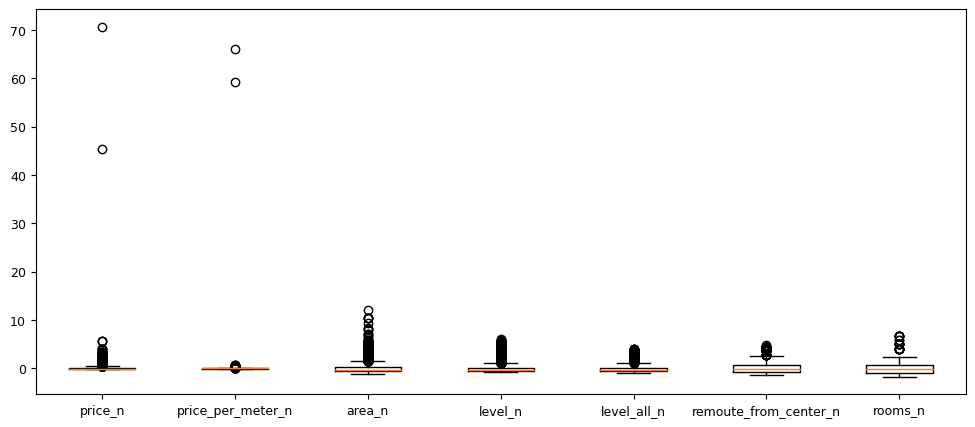

In [55]:
# визуализируем распределения признаков
show_boxplots(std)

/tmp/ipykernel_128/975116304.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.columns)


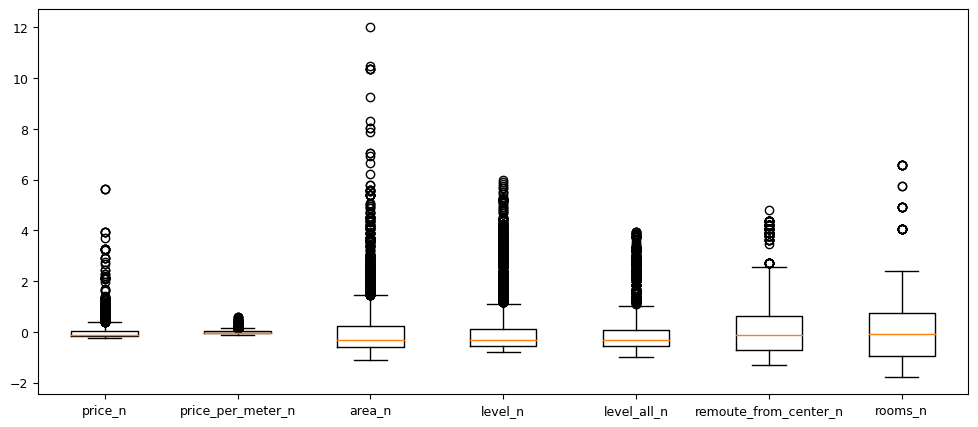

In [57]:
# удалим выбросы в наборах данных price_n и price_per_meter_n и заново визуализируем распределения
cut_outliers = (std.price_n <= 40) & (std.price_per_meter_n <= 50)
std = std.loc[cut_outliers]
show_boxplots(std)

Графики распределения количественных данных level, area, price, remoute_from_center, price_per_meter не симметричны, скошены вправо, что свидетельствет о наличии на рынке недвижимости Москвы высотных домов, домов со значительной удаленностью от центра и квартир премиум-сегмента (квартиры большой площади, с высокой арендной платой).\
Чтобы минимизировать влияние выбросов, но при этом сохранить общую картину рынка, принято решение удалить записи со значениями, которые превышают:
- по площади (area) 260 кв. м 
- по арендной плате (price) - 650 тыс. руб.
- цене аренды за 1 кв. метр (price_per_meter) - 6000 руб.
- по расстоянию от центра (remoute_from_center) - 40 км
- по количеству этажей дома (level_all) - 90
- по количеству комнат (rooms) - 6

In [63]:
# сформировать фильтр и отсечь 'экстремальные' значения
cut_outliers =(rent.area <= 260) & (rent.price <= 650_000) & (rent.price_per_meter <= 6_000) & (rent.remoute_from_center <= 40) & (rent.level_all <= 90) & (rent.rooms <= 6)
rent = rent.loc[cut_outliers]
rent.reset_index(drop=True, inplace=True)

In [65]:
# вывести размерность итогового датасета
rent.shape

(7644, 11)

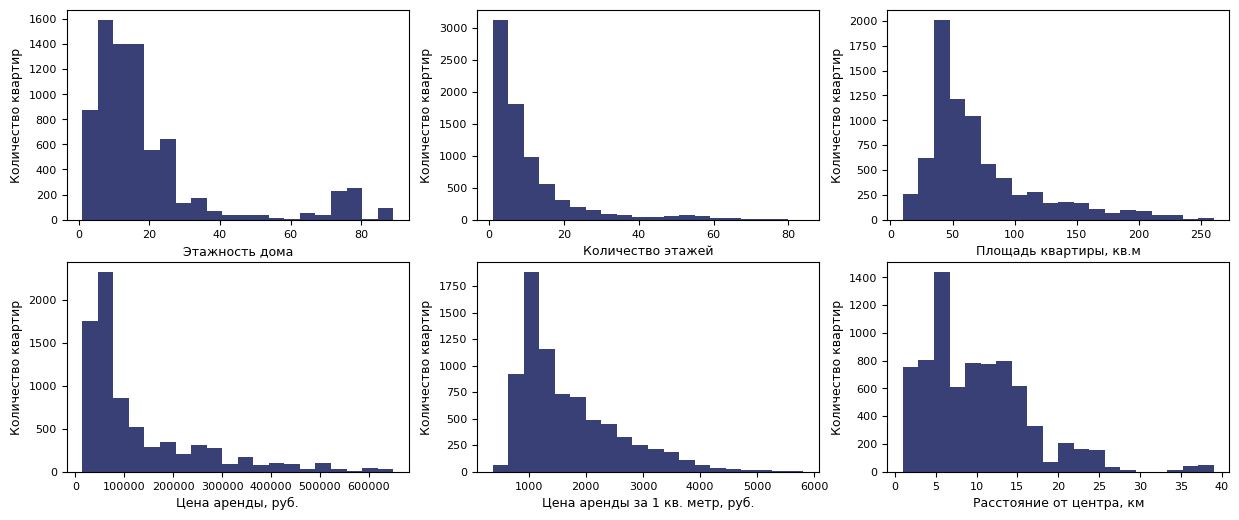

In [67]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))
labels = [['Этажность дома', 'Количество этажей', 'Площадь квартиры, кв.м'], ['Цена аренды, руб.', 'Цена аренды за 1 кв. метр, руб.', 'Расстояние от центра, км']]
columns =[['level_all', 'level', 'area'], ['price', 'price_per_meter', 'remoute_from_center']]
for i in range(2):
    for j in range(3):
        ax[i][j].set_xlabel(labels[i][j], fontsize=9)
        ax[i][j].set_ylabel('Количество квартир', fontsize=9)
        ax[i][j].tick_params(axis='both', labelsize=8)
        ax[i][j].hist(rent[columns[i][j]], bins=20, color='#394075')

plt.show();

### 12. Переименование столбцов

In [69]:
columns={'rooms': 'Количество комнат',
         'level': 'Этаж',
         'area': 'Площадь',
         'price': 'Цена аренды',
         'material': 'Конструктив дома',
         'published': 'Дата публикации',
         'city': 'Город',
         'remoute_from_center': 'Расстояние от центра',
         'build_oldest': 'Тип недвижимости',
         'level_all': 'Этажность',
         'price_per_meter': 'Цена аренды за кв.метр'}
rent = rent.rename(columns=columns)
rent[:3]

,Количество комнат,Этаж,Площадь,Цена аренды,Конструктив дома,Дата публикации,Город,Расстояние от центра,Тип недвижимости,Этажность,Цена аренды за кв.метр
0,1,2,32.0,29000.0,Панель,2021-11-22,Москва,11.0,старый фонд,5,906.0
1,1,1,31.0,48000.0,Панель,2022-01-11,Москва,17.0,старый фонд,9,1548.0
2,1,5,38.9,44000.0,Панель,2022-02-03,Москва,10.0,вторичка,9,1131.0


### 13. Сохранение датасета в файл

In [71]:
rent.to_csv('rent_apartament_for analysis.csv', index_label='id')